# Discrete Fourier Transform

In [1]:
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile

Populating the interactive namespace from numpy and matplotlib


## Operations

* Analysis
* Synthesis

### Analysis

* Map a set of N signals from time-domain to frequency domain.
* Find the contribution (magnitude and phase) of different signals.
* Change *basis*, change of perspective – discover "hidden" signal properties

//Assuming a set of N signals, $X_0, X_1, ..., X_N-1$

A function that takes a vector of signals $x$ and complex exponentials $w^k$ and returns the result of taking their inner-product, a vector of complex numbers $[Re, Im]$

**Analysis: **

$$X[k]=<w_n^{(k)},x_n>, \quad k=0, 1, ..., N-1$$

$$X[k]=\sum_{n=0}^{N-1} x[n]W_N^{nk}, \quad k=0, 1, ..., N-1$$

$$X[k]=\sum_{n=0}^{N-1} x[n]e^{-j \frac{2\pi}{N} nk}, \quad k=0, 1, ..., N-1N-1$$


* $w_k[n] = e^{-j \frac{2\pi}{N} nk}$ is a complex exponential, at frequency (fundamental frequency) $\omega = \frac{2\pi}{N}k$


#### Example with a linear ramp

In [2]:
x = np.arange(0, 1.02, 0.02) - 0.5; x

array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
       -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
       -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
        0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
        0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
        0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ])

In [3]:
x.shape

(51,)

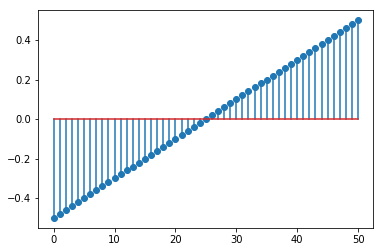

In [4]:
plt.stem(x);

In [5]:
X = np.fft.fft(x); X

array([ 3.88578059e-16+0.j        , -5.10000000e-01+8.26876551j,
       -5.10000000e-01+4.1186549j , -5.10000000e-01+2.72825903j,
       -5.10000000e-01+2.0277516j , -5.10000000e-01+1.60315399j,
       -5.10000000e-01+1.31646175j, -5.10000000e-01+1.10851973j,
       -5.10000000e-01+0.94974073j, -5.10000000e-01+0.82367828j,
       -5.10000000e-01+0.72045566j, -5.10000000e-01+0.63377892j,
       -5.10000000e-01+0.55944335j, -5.10000000e-01+0.49452907j,
       -5.10000000e-01+0.43694125j, -5.10000000e-01+0.38513412j,
       -5.10000000e-01+0.33793826j, -5.10000000e-01+0.29444864j,
       -5.10000000e-01+0.25394983j, -5.10000000e-01+0.21586449j,
       -5.10000000e-01+0.17971707j, -5.10000000e-01+0.14510751j,
       -5.10000000e-01+0.11169172j, -5.10000000e-01+0.07916664j,
       -5.10000000e-01+0.04725846j, -5.10000000e-01+0.01571293j,
       -5.10000000e-01-0.01571293j, -5.10000000e-01-0.04725846j,
       -5.10000000e-01-0.07916664j, -5.10000000e-01-0.11169172j,
       -5.10000000e-01-0.

In [6]:
X.shape

(51,)

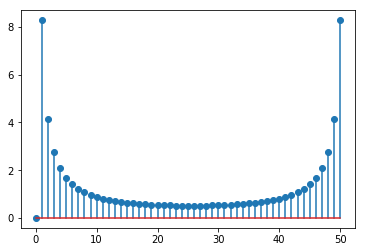

In [7]:
plt.stem(abs(X));

#### Positive and negative frequencies
The coefficient number $k$ indicates the contribution (in amplitude and phase) of the sinusoidal component of frequency $\omega = \frac{2\pi}{N}k$

Because of the rotational symmetry of complex exponentials, a positive frequency $\omega$ between $\pi$ and $2\pi$ is equivalent to a negative frequency of $\omega - 2\pi$;
![caption](./CEGM.png)

1. This means that half of the DFT coefficients $X$ correspond to negative frequencies
2. When we concentrate on the physical properties of the DFT, it would probably make more sense to plot the coefficients $X$ centered around zero with positive frequencies on the right and negative frequencies on the left


##### Note:

When shifting a DFT vector: **we need to differentiate between odd and even length signals**

* With $k=0$ as the center point, odd-length vectors will produce *symmetric* data set with $(N-1)/2$ points left and right of the origin ($k=0$)
* With $k=0$ as the center point, even-length vectors will be *asymmetric*, with one more point at the right (positive) axis
    * The highest positive frequency for even-length signals will be equal to $\omega_{N/2}=\pi$.
    * Since the frequencies of $\pi$ and $-\pi$ are identical, we can copy the highest positive frequency to the negative axis and obtain a *symmetric* vector

In [8]:
def dft_shift(X):
    N = len(X)
    # even-length: return N+1 values
    if (N % 2 == 0):
        low = X[int((N / 2)):]
        high = X[:int((N / 2) + 1)]
        y = np.concatenate((low, high))

        # indices
        n = np.arange(-N/2, N/2+1)
        
        return n, y
    
    # odd-length: return N values
    else:
        low = X[int((N+1) / 2):]
        high = X[:int((N-1)/2)]
        y = np.concatenate((low, high))
        
        n = np.arange(-(N-1)/2, (N-1)/2)
        
        return n, y
    

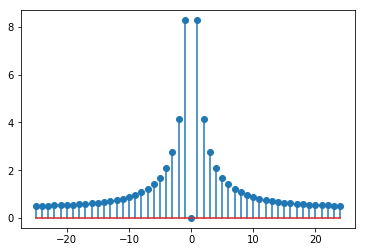

In [9]:
n, y = dft_shift(X)
plt.stem(n, abs(y));

#### Mapping the DFT index to real-world frequencies

* We need to set the time interval between samples – "clock" of the system.
* For audio, this is equivalent to the sampling rate $(Fs)$ of the audio-file.

In [10]:
Fs, x = wavfile.read("../data/1.wav")

In [11]:
Fs

44100

In [12]:
x.shape

(220544,)

In [13]:
IPython.display.Audio(x, rate=Fs)

To see the spectrum of the sound file (with a DFT) we need to map the digital frequency "bins" to real-world frequencies.

The $k-th$ basis function over $C^N$ completes $k$ periods over $N$ samples. 
* If the time between samples is $1/F_s$, 
* then the real-world frequency of the $k-th$ basis function is periods over time: $k(F_s/N)$

Remap the DFT coefficients using the sampling rate:

In [14]:
def dft_map(X, Fs, shift=True):
    resolution = float(Fs) / len(X)
    if shift:
        n, Y = dft_shift(X)
    else:
        Y = X
        n = np.arange(0, len(Y))
    
    f = n * resolution
    return f, Y

In [15]:
# clip the signal – otherwise it's too big
# x = x[:32768]
X = np.fft.fft(x)
X.shape

(220544,)

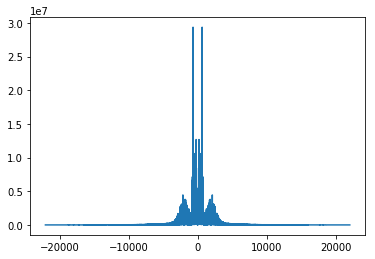

In [16]:
f, y = dft_map(X, Fs)
plt.plot(f, abs(y));

Above plot shows what a spectrum analyzer would display. There is a periodic pattern in the sound. 

Let's zoom in on the plot and find the first peak. Here we don't want to shift the DFT.

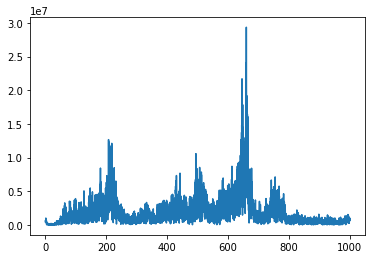

In [21]:
X = np.fft.fft(x)
f, y = dft_map(X, Fs, shift=False)
plt.plot(f[:5000], abs(y[:5000]));

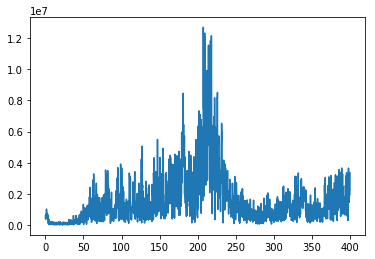

In [23]:
plt.plot(f[:2000], abs(y[:2000]));

There is a tall peak around 225Hz; To find the exact frequency (to within the resolution afforded by this DFT) we want to it's location

In [46]:
dft_resolution = float(Fs) / len(x)
print("DFT resolution is {:.3f} Hz".format(dft_resolution))

DFT resolution is 0.200 Hz


In [61]:
# searching up to 300Hz
max_range = int(300 / dft_resolution)
ix = np.argmax(abs(y[:max_range]))
print("Maximum range: {}, index of highest y: {}".format(max_range, ix))

Maximum range: 1500, index of highest y: 1037


In [53]:
pitch = f[ix]
print("The note has a pitch of {:.3f} Hz".format(pitch))

The note has a pitch of 207.359 Hz
